#  Linear Regression

## Geely Auto Assignment

### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American Market.

We are required to model the price of cars with the available independent variables. The proposed model will be used by the management to understand how exactly the prices vary with the independent variables


# 1. Importing Libraries, data and understanding Data

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# library for splitting data into test and train.
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn.preprocessing import MinMaxScaler

# Library for RFE and Linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# statsmodel library
import statsmodels.api as sm

# Library for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library for r2_score calcultion
from sklearn.metrics import r2_score


In [144]:
#importing data
cardata=pd.read_csv('E:\\Study\\ML&AI\\Machine Learning-I\\Linear regression\\Assignment\\CarPrice_Assignment.csv')

In [145]:
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [146]:
cardata.shape

(205, 26)

In [147]:
cardata.info()
#all datatypes also seem okay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [148]:
# checking data statistics
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [149]:
#checking null values
cardata.isnull().sum()
#no null value found

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [150]:
# car_ID is not required for nalysis. Drop it
cardata.drop('car_ID', axis=1, inplace=True)

In [151]:
# coverting car name to car company name
pd.set_option('display.max_columns', None)
cardata['car_company'] = cardata['CarName'].apply(lambda x: x.split( )[0])
cardata.drop('CarName',axis=1,inplace=True)
cardata.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [152]:
# there are some mismatch in the car names, making them right
cardata['car_company'].replace('maxda','mazda',inplace=True)
cardata['car_company'].replace('Nissan','nissan',inplace=True)
cardata['car_company'].replace('porcshce','porsche',inplace=True)
cardata['car_company'].replace('toyouta','toyota',inplace=True)
cardata['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

### Now the data is okay, we can proceed for EDA and visulisation

# 2. EDA and data visulisation

<Figure size 1800x1800 with 0 Axes>

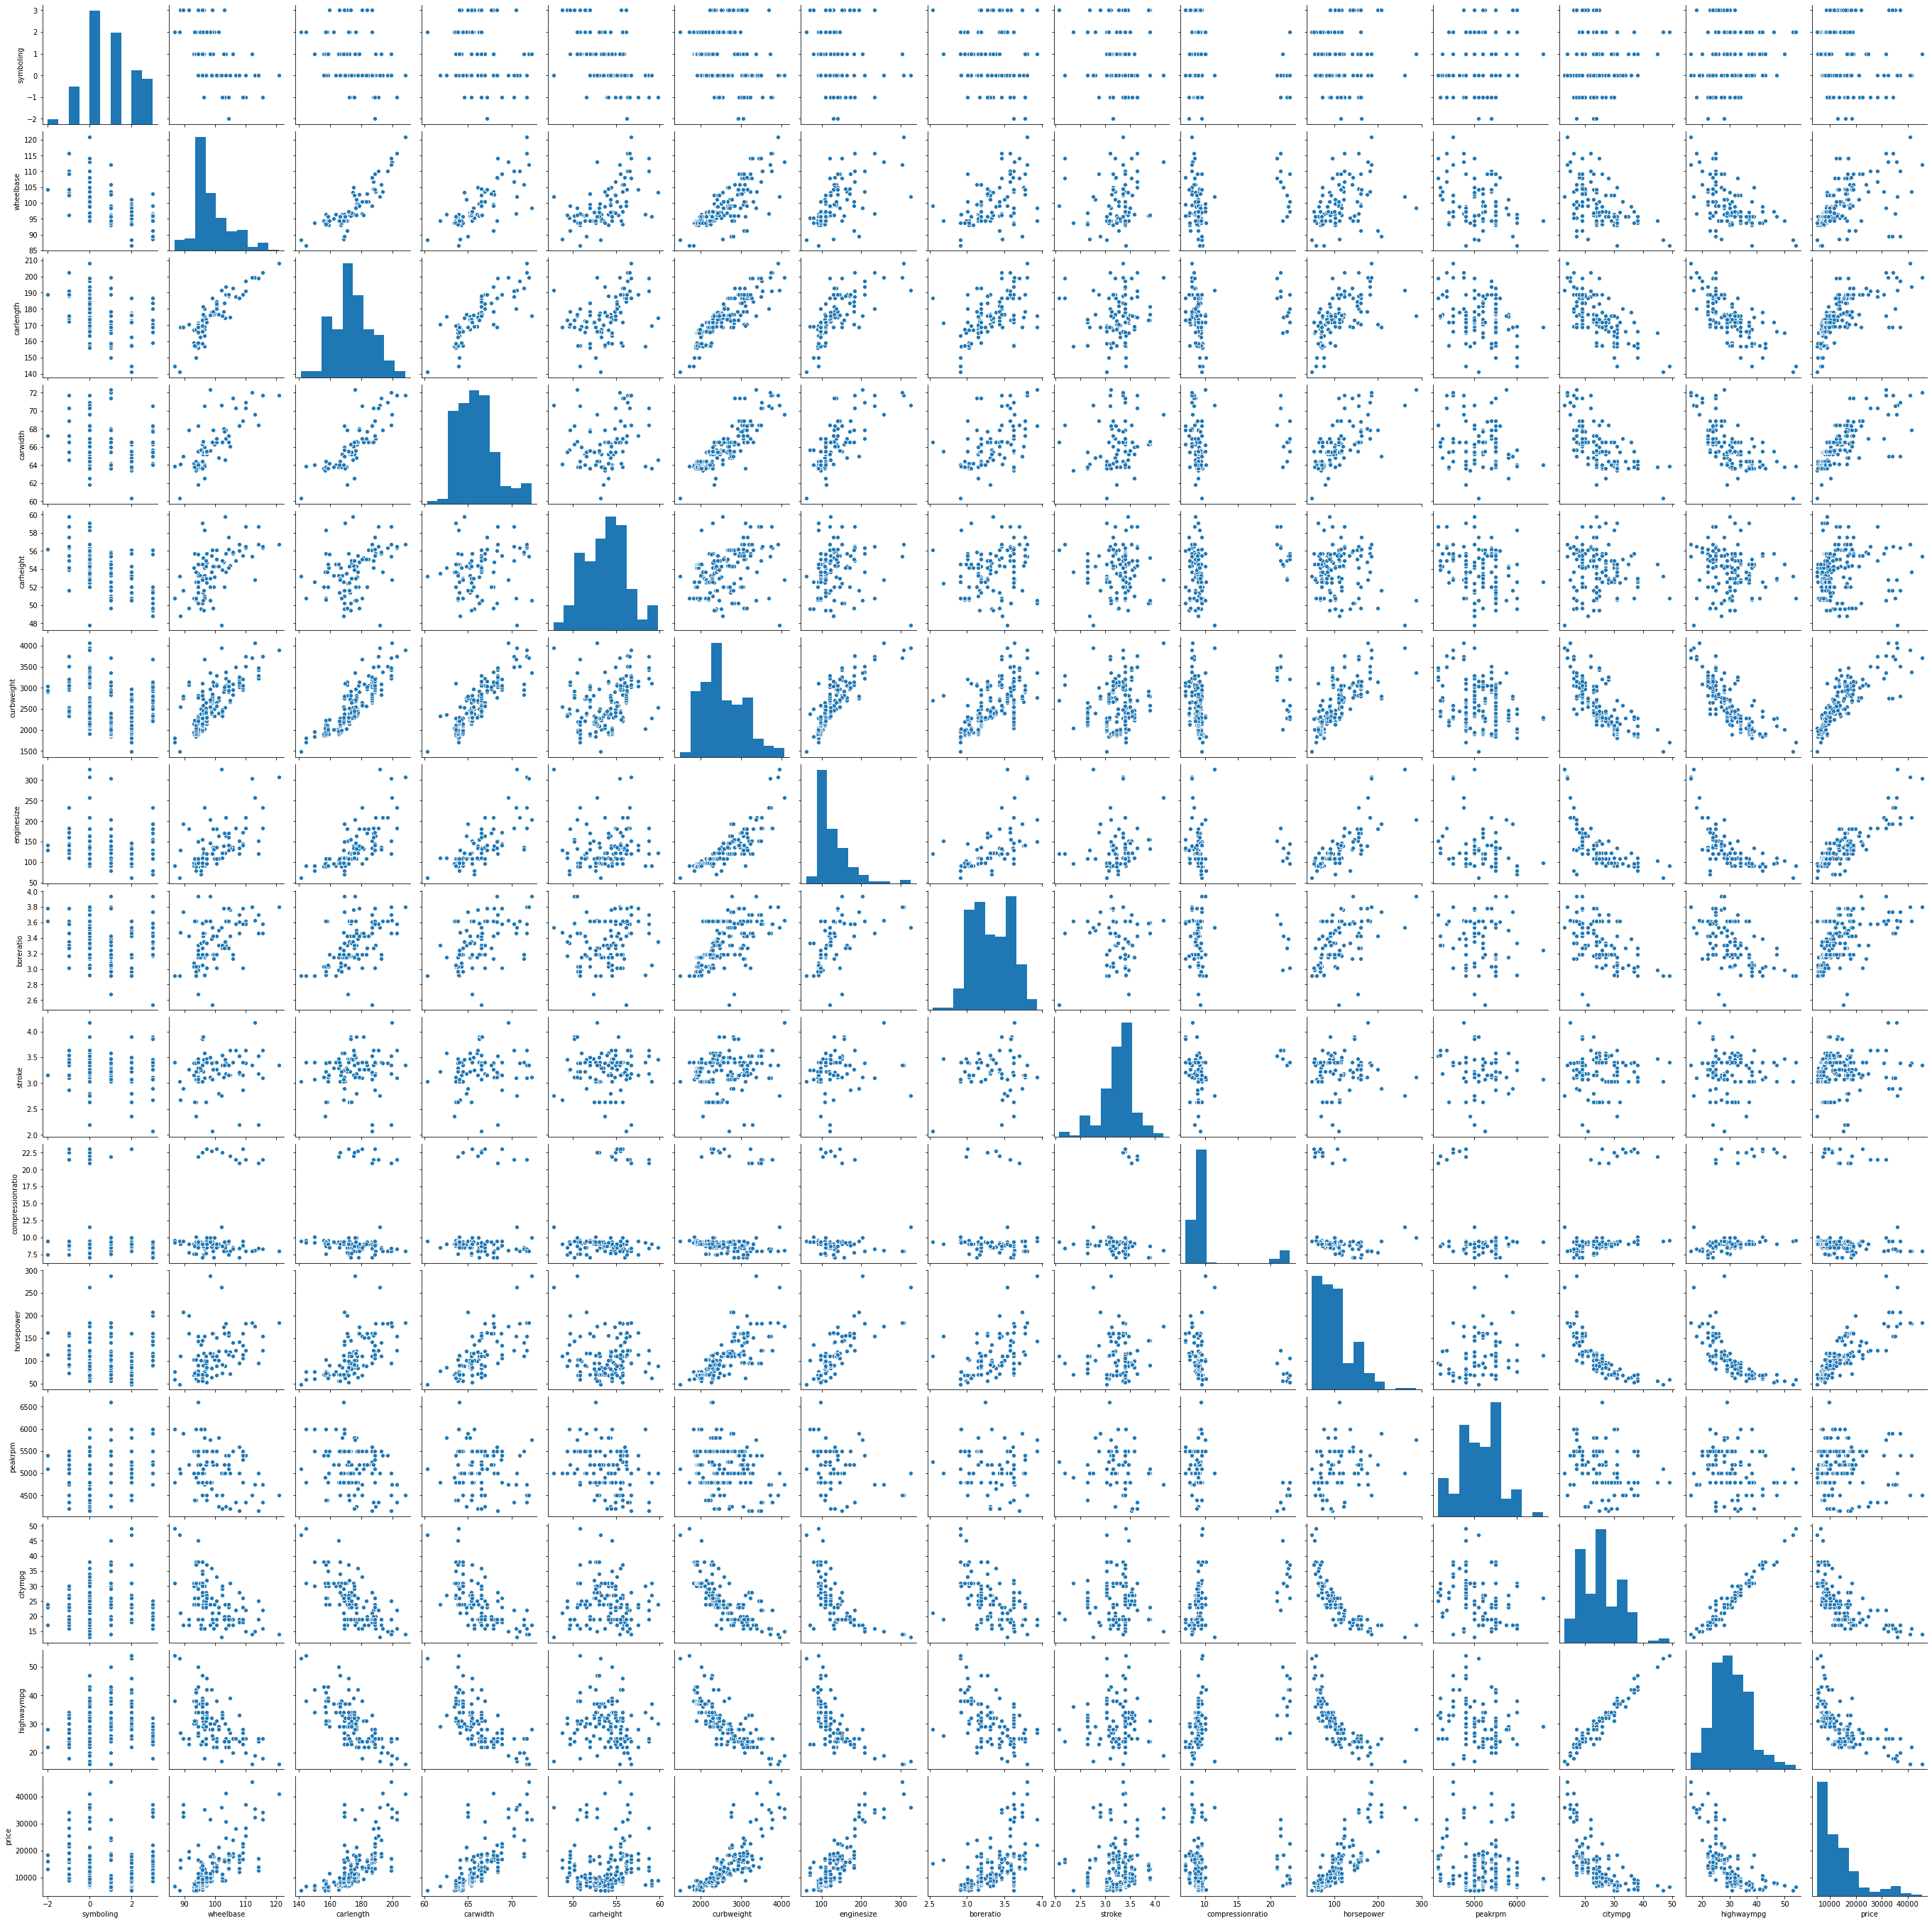

In [153]:
# check the vaiables data. We can clearly analyse that for some of the variables, price is more or less 
# linearly dependent on them. So, linear regression can be used.
plt.figure(figsize = (25, 25))
sns.pairplot(cardata)
plt.show()

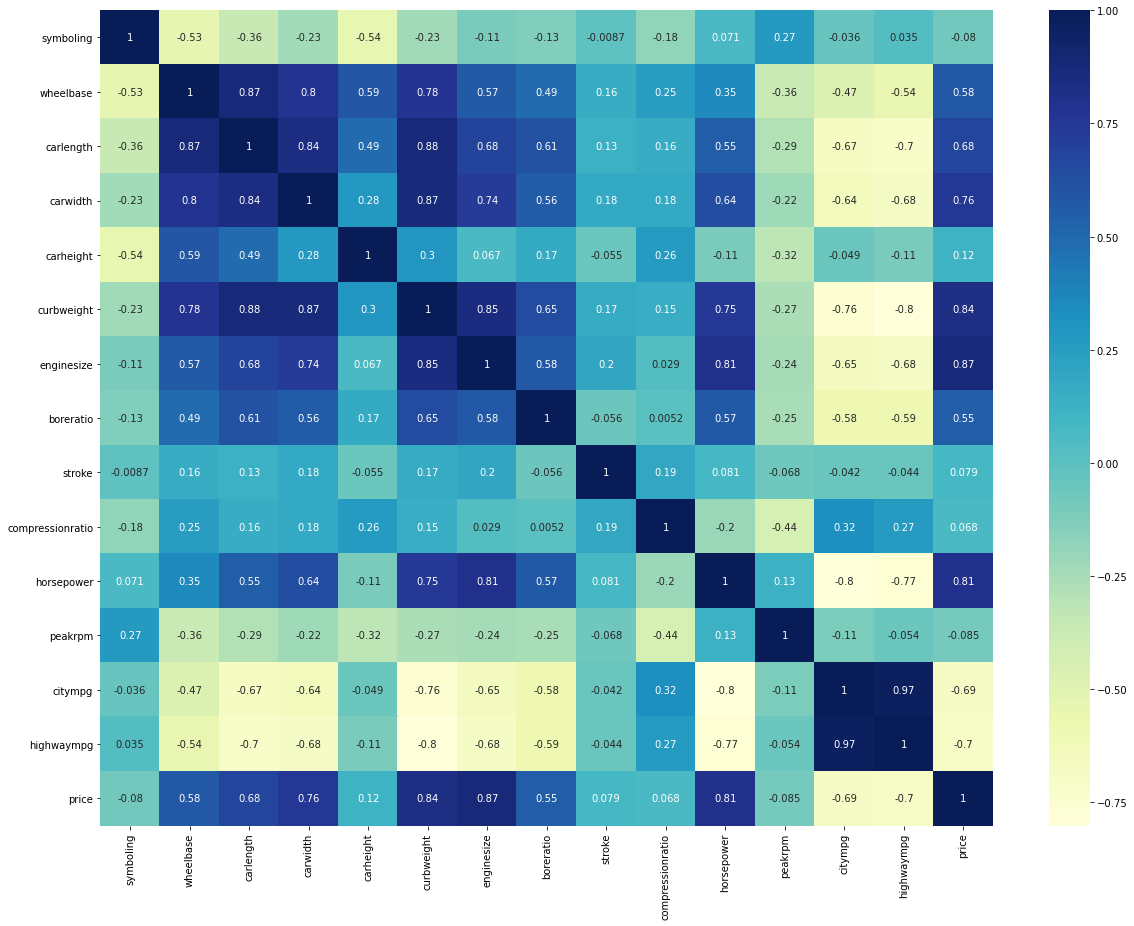

In [154]:
# checking correlation between variables
plt.figure(figsize = (20, 15))
correlation=cardata.corr()
sns.heatmap(correlation, annot = True, cmap="YlGnBu")
plt.show()
# some of the variables are correlated with others. If we talk about price it find a substantial correlation with lot of variables

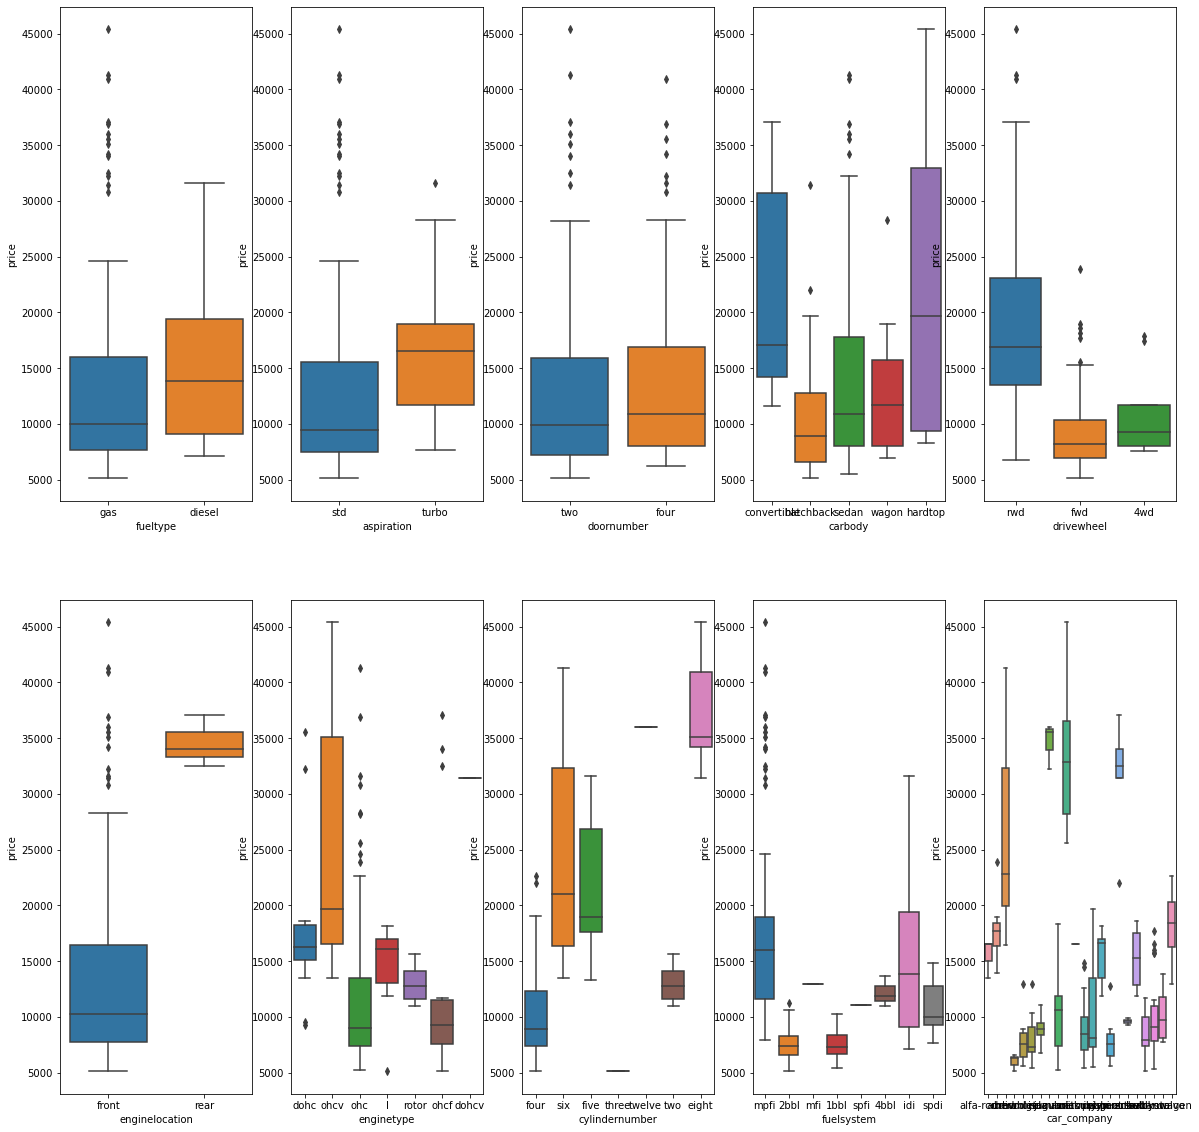

In [155]:
# plotting boxplots for categorial variables against price
plt.figure(figsize=(20, 20))
plt.subplot(2,5,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cardata)
plt.subplot(2,5,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cardata)
plt.subplot(2,5,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cardata)
plt.subplot(2,5,4)
sns.boxplot(x = 'carbody', y = 'price', data = cardata)
plt.subplot(2,5,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardata)
plt.subplot(2,5,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardata)
plt.subplot(2,5,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cardata)
plt.subplot(2,5,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardata)
plt.subplot(2,5,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardata)
plt.subplot(2,5,10)
sns.boxplot(x = 'car_company', y = 'price', data = cardata)
plt.show()

# Diesel vehiles are more expensive than gas fuel type. Turboo cars are also having higher prices. 
# Rear whell drives are also expensive. Rear egine types are almost 3 times expensive than that of front engines
# with cylinder numers, price increases
# car price is directly depended on the manufacturing companies


In [156]:
# checking car companies value counts
cardata['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

<AxesSubplot:xlabel='price'>

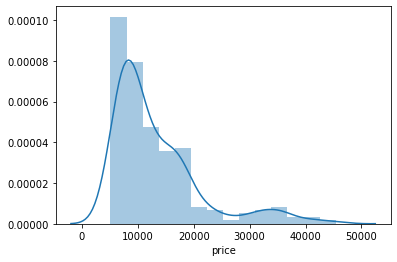

In [157]:
# plotting number of cares againt price
sns.distplot(cardata['price'])
# clearly economical cars are having large market

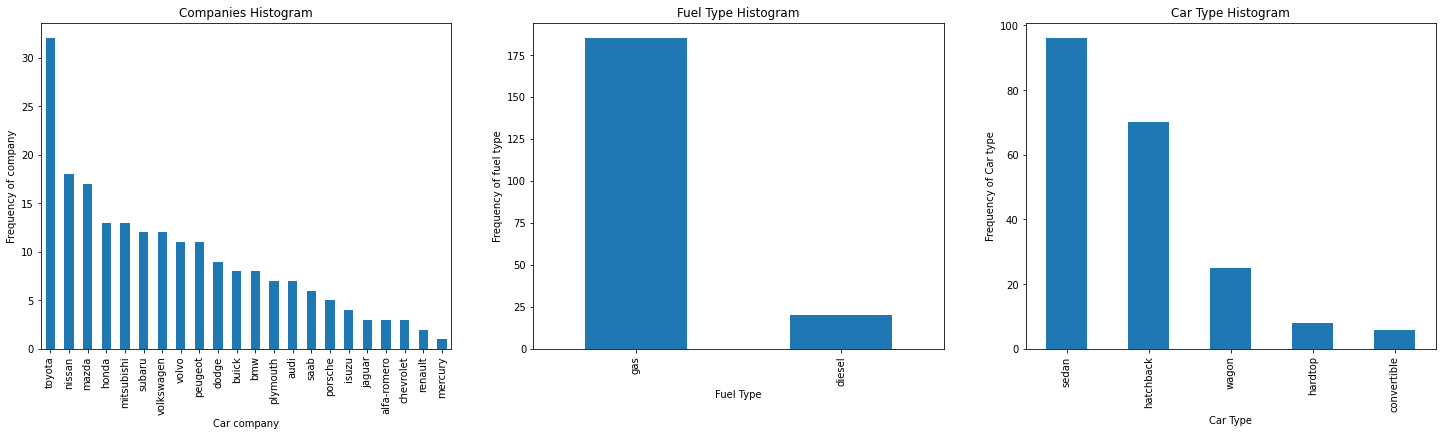

In [158]:
# plotting car company, fuel type and car types anaginst sale counts
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cardata.car_company.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cardata.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cardata.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

# Toyota is the biggest player in the market which captures almost 16% market, other car companies are cariing between 0-8%.
# out of 205 observations, gas cars are 180. So diesel vehiles are having less demand. The possible reason may be price. Diesel cars are expensive than gas
# Sedan is having largest market, follwed by hatchback and wagon

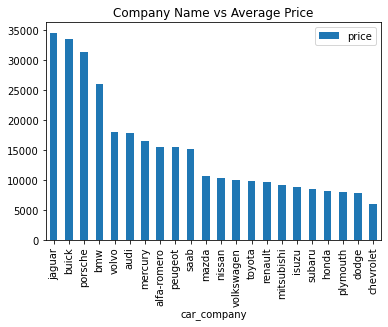

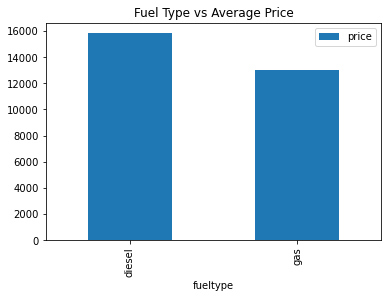

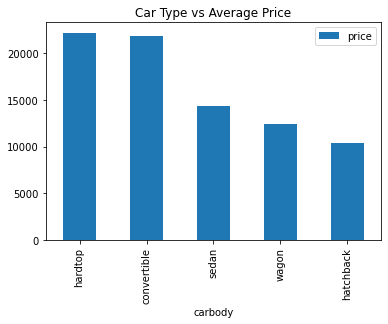

In [159]:

# Plotting price against car company, fuel type and car type

df = pd.DataFrame(cardata.groupby(['car_company'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cardata.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cardata.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

# jaguar, buick, porsche and bmw are most expensive cars while chevrolet is the cheapest (by average price)
# Diesel cars are almost 30% expensive than gas cars
# hardtop and hatchback are expensive cars compare to other types. Hatchback are cheapest

In [160]:
# checking numerical values of car coampnies median price
cardata_category = cardata.groupby(['car_company']).median()
cardata_category['price']

car_company
alfa-romero    16500.0
audi           17710.0
bmw            22835.0
buick          32892.0
chevrolet       6295.0
dodge           7609.0
honda           7295.0
isuzu           8916.5
jaguar         35550.0
mazda          10595.0
mercury        16503.0
mitsubishi      8499.0
nissan          8124.0
peugeot        16630.0
plymouth        7609.0
porsche        32528.0
renault         9595.0
saab           15275.0
subaru          7894.0
toyota          9103.0
volkswagen      9737.5
volvo          18420.0
Name: price, dtype: float64

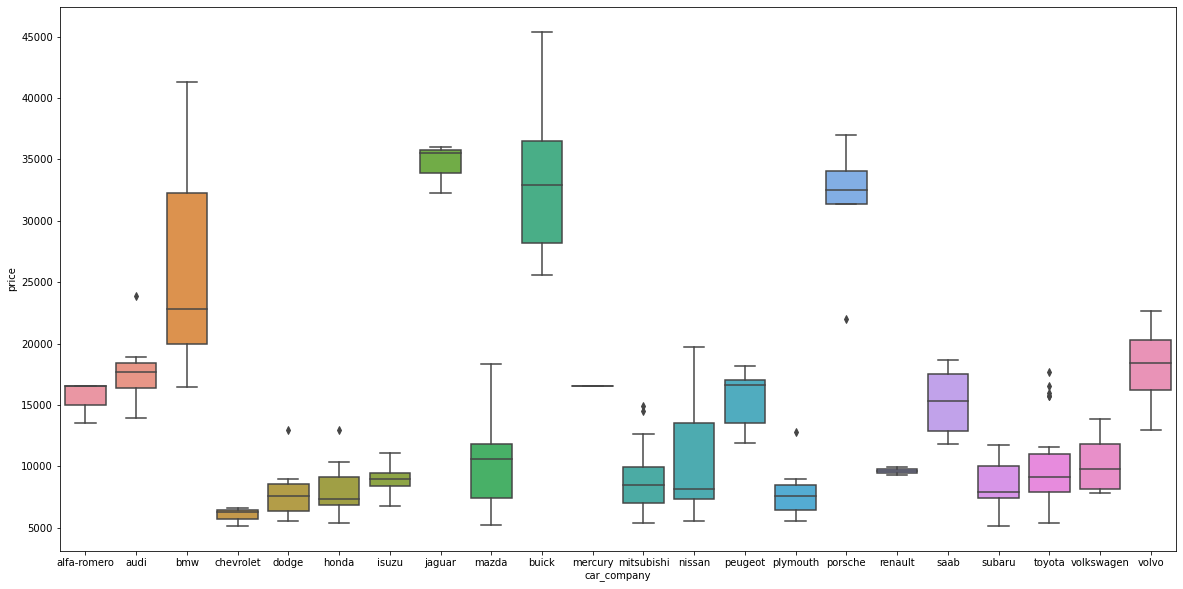

car_company
jaguar         35550.0
buick          32892.0
porsche        32528.0
bmw            22835.0
volvo          18420.0
audi           17710.0
peugeot        16630.0
mercury        16503.0
alfa-romero    16500.0
saab           15275.0
mazda          10595.0
volkswagen      9737.5
renault         9595.0
toyota          9103.0
isuzu           8916.5
mitsubishi      8499.0
nissan          8124.0
subaru          7894.0
plymouth        7609.0
dodge           7609.0
honda           7295.0
chevrolet       6295.0
Name: price, dtype: float64


In [161]:
#Checking price distribution by car companies
plt.figure(figsize=(20,10))
sns.boxplot(x = 'car_company', y = 'price', data = cardata)
plt.show()
print(cardata.groupby('car_company').price.median().sort_values(ascending=False))

# 3. Data Preperation

### Converting car companies into 3 categories as per their price range for ease in calculation

In [162]:
car_segment_dict = {
    'cheverolet' : 'economic',
    'dodge' : 'economic',
    'plymouth' : 'economic',
    'honda' : 'economic',
    'subaru' : 'economic',
    'isuzu' : 'economic',
    'mitsubishi' : 'economic',
    'renault' : 'economic',
    'toyota' : 'economic',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'premier',
    'buick' : 'premier',
    'porsche' : 'premier',
    'jaguar' : 'premier'}
cardata['car_segment'] = cardata['car_company'].map(car_segment_dict)
cardata.drop('car_company',axis=1,inplace=True)
cardata.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_segment
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


### Converting symboling ratings into 3 categories. numerical values can mislead it as  continuous variable data

In [163]:
cardata['symboling'] = cardata['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [164]:
cardata.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


### Mapping data to binary for columns which has only two categorial values

In [165]:
cardata['fueltype'] = cardata['fueltype'].map({'diesel':0, 'gas':1})
cardata['aspiration'] = cardata['aspiration'].map({'turbo':0, 'std':1})
cardata['doornumber'] = cardata['doornumber'].map({'two':0, 'four':1})
cardata['enginelocation'] = cardata['enginelocation'].map({'rear':0, 'front':1})


# Assigning dummy variables to ['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling','car_segment'] columns

cardata = pd.get_dummies(cardata, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling','car_segment' ], drop_first = True)


In [166]:
# dropping the columns which are more than 0.8 correlatd with othet independent variables.
cardata.drop(labels=['carwidth', 'curbweight', 'wheelbase', 'citympg', 'horsepower'], axis = 1, inplace=True)

In [167]:
cardata.shape

(205, 42)

### splitting data into test and train

In [168]:
car_train, car_test = train_test_split(cardata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [169]:
car_train.shape

(143, 42)

### scaling the data by MinMaxScaler

In [170]:

scaler = MinMaxScaler()

num_vars = ['carlength', 'carheight', 'enginesize', 'boreratio' ,'stroke', 'highwaympg', 'compressionratio', 'peakrpm', 'price']

car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

In [171]:
car_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,car_segment_midtier,car_segment_premier
122,1,1,1,1,0.426016,0.265487,0.139623,0.230159,0.525253,0.15000,0.551020,0.567568,0.068818,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
125,1,1,0,1,0.452033,0.212389,0.339623,1.000000,0.464646,0.15625,0.551020,0.270270,0.466890,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
166,1,1,0,1,0.448780,0.424779,0.139623,0.444444,0.449495,0.15000,1.000000,0.324324,0.122110,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,1,0.450407,0.088496,0.260377,0.626984,0.247475,0.12500,0.346939,0.270270,0.314446,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
199,1,0,1,1,0.775610,0.858407,0.260377,0.746032,0.484848,0.03125,0.387755,0.135135,0.382131,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


### splitting data to dependent and independent variables

In [172]:
y_train =car_train.pop('price')
X_train = car_train

# 4. Linear Regression Modelling

In [173]:
# Defining linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 15 output variables.
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [174]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 20),
 ('aspiration', False, 3),
 ('doornumber', False, 17),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 21),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('peakrpm', True, 1),
 ('highwaympg', False, 9),
 ('drivewheel_fwd', False, 13),
 ('drivewheel_rwd', False, 23),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 11),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', False, 14),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 7),
 ('cylindernumber_four', False, 6),
 ('cylindernumber_six', False, 8),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 2),
 ('fuelsystem_2bbl', False, 16),
 ('fuelsystem_4bbl', False, 12),
 ('fuelsystem_idi', Fa

In [175]:
# checking RFE columns- 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carlength', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'car_segment_premier'],
      dtype='object')

In [176]:
# variables that are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'compressionratio',
       'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_risky',
       'symboling_safe', 'car_segment_midtier'],
      dtype='object')

In [177]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [178]:
# Adding a constant variable  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [179]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   

In [180]:
# check results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     88.13
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.65e-59
Time:                        04:23:58   Log-Likelihood:                 191.01
No. Observations:                 143   AIC:                            -350.0
Df Residuals:                     127   BIC:                            -302.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

### However R-squared value is more than 0.9, but the model is not right. Alot of variables are not significant.

In [181]:
# defining VIF function
def findVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [182]:
# Calculate the VIFs again for the model
vif_val_1 = findVIF(X_train_rfe)
vif_val_1

,Features,VIF
0,enginelocation,48.93
1,carlength,33.40
2,enginesize,23.58
4,stroke,20.38
8,carbody_sedan,18.90
3,boreratio,15.52
7,carbody_hatchback,13.13
9,carbody_wagon,6.21
5,peakrpm,6.18
14,car_segment_premier,2.56


 ### Model 2: Drop variable enginetype_dohcv due to high p-value

In [183]:
# defining new linear regression model
X_train_rfe2 = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)
X_train_rfe2_sm = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_rfe2_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.67
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.13e-60
Time:                        04:23:58   Log-Likelihood:                 189.98
No. Observations:                 143   AIC:                            -350.0
Df Residuals:                     128   BIC:                            -305.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [184]:
# Calculate the VIFs for the new model
vif_val_2 = findVIF(X_train_rfe2)
vif_val_2

,Features,VIF
0,enginelocation,48.72
1,carlength,32.67
2,enginesize,23.42
4,stroke,20.33
8,carbody_sedan,18.89
3,boreratio,15.02
7,carbody_hatchback,13.09
9,carbody_wagon,6.20
5,peakrpm,6.03
13,car_segment_premier,2.51


 ### Model 3: Drop variable carbody_hardto due to high p-value

In [185]:
# defining new linear regression model
X_train_rfe3 = X_train_rfe2.drop(["carbody_hardtop"], axis = 1)
X_train_rfe3_sm = sm.add_constant(X_train_rfe3)
lm = sm.OLS(y_train,X_train_rfe3_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     99.19
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.69e-60
Time:                        04:23:58   Log-Likelihood:                 188.37
No. Observations:                 143   AIC:                            -348.7
Df Residuals:                     129   BIC:                            -307.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [186]:
# Calculate the VIFs again for the new model
vif_val_3 = findVIF(X_train_rfe3)
vif_val_3

,Features,VIF
0,enginelocation,48.19
1,carlength,32.67
2,enginesize,23.04
4,stroke,18.66
7,carbody_sedan,14.35
3,boreratio,13.81
6,carbody_hatchback,9.87
5,peakrpm,5.69
8,carbody_wagon,5.03
12,car_segment_premier,2.50


 ### Model 4: Drop variable enginelocation due to high p-value

In [187]:
X_train_rfe4 = X_train_rfe3.drop(["enginelocation"], axis = 1)
X_train_rfe4_sm = sm.add_constant(X_train_rfe4)
lm = sm.OLS(y_train,X_train_rfe4_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     105.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.64e-61
Time:                        04:23:59   Log-Likelihood:                 186.78
No. Observations:                 143   AIC:                            -347.6
Df Residuals:                     130   BIC:                            -309.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [188]:
# Calculate VIF values for new model
vif_val_4 = findVIF(X_train_rfe4)
vif_val_4

,Features,VIF
0,carlength,32.41
1,enginesize,22.85
3,stroke,15.31
2,boreratio,11.81
6,carbody_sedan,9.90
5,carbody_hatchback,6.36
4,peakrpm,5.06
7,carbody_wagon,3.70
11,car_segment_premier,2.47
10,cylindernumber_twelve,1.68


 ### Model 5: Drop variable boreratio due to high p-value

In [189]:
X_train_rfe5 = X_train_rfe4.drop(["boreratio"], axis = 1)
X_train_rfe5_sm = sm.add_constant(X_train_rfe5)
lm = sm.OLS(y_train,X_train_rfe5_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.75e-61
Time:                        04:23:59   Log-Likelihood:                 185.11
No. Observations:                 143   AIC:                            -346.2
Df Residuals:                     131   BIC:                            -310.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [190]:
# Calculate VIF values for new model
vif_val_5 = findVIF(X_train_rfe5)
vif_val_5

,Features,VIF
0,carlength,28.18
1,enginesize,21.37
2,stroke,14.25
5,carbody_sedan,9.46
4,carbody_hatchback,5.83
3,peakrpm,5.03
6,carbody_wagon,3.57
10,car_segment_premier,2.47
9,cylindernumber_twelve,1.61
7,enginetype_rotor,1.41


 ### Model 6: Drop variable stroke due to high p-value

In [191]:
X_train_rfe6 = X_train_rfe5.drop(["stroke"], axis = 1)
X_train_rfe6_sm = sm.add_constant(X_train_rfe6)
lm = sm.OLS(y_train,X_train_rfe6_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.00e-61
Time:                        04:23:59   Log-Likelihood:                 183.54
No. Observations:                 143   AIC:                            -345.1
Df Residuals:                     132   BIC:                            -312.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [192]:
# Calculate VIF values for new model
vif_val_6 = findVIF(X_train_rfe6)
vif_val_6

,Features,VIF
0,carlength,28.18
1,enginesize,19.05
4,carbody_sedan,7.40
2,peakrpm,4.80
3,carbody_hatchback,4.13
5,carbody_wagon,3.20
9,car_segment_premier,2.39
8,cylindernumber_twelve,1.43
6,enginetype_rotor,1.40
7,cylindernumber_three,1.05


 ### Model 7: Drop variable carlength due to high p-value

In [193]:
X_train_rfe7 = X_train_rfe6.drop(["carlength"], axis = 1)
X_train_rfe7_sm = sm.add_constant(X_train_rfe7)
lm = sm.OLS(y_train,X_train_rfe7_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.82e-56
Time:                        04:23:59   Log-Likelihood:                 167.75
No. Observations:                 143   AIC:                            -315.5
Df Residuals:                     133   BIC:                            -285.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [194]:
# Calculate VIF values for new model
vif_val_7 = findVIF(X_train_rfe7)
vif_val_7

,Features,VIF
0,enginesize,6.56
1,peakrpm,4.79
3,carbody_sedan,4.10
2,carbody_hatchback,3.53
8,car_segment_premier,2.19
4,carbody_wagon,1.77
5,enginetype_rotor,1.22
7,cylindernumber_twelve,1.19
6,cylindernumber_three,1.04


 ### Model 8: Drop variable carbody_wagon due to high p-value

In [195]:
X_train_rfe8 = X_train_rfe7.drop(["carbody_wagon"], axis = 1)
X_train_rfe8_sm = sm.add_constant(X_train_rfe8)
lm = sm.OLS(y_train,X_train_rfe8_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.72e-57
Time:                        04:24:00   Log-Likelihood:                 167.67
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     134   BIC:                            -290.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [196]:
# Calculate VIF values for new model
vif_val_8 = findVIF(X_train_rfe8)
vif_val_8

,Features,VIF
0,enginesize,5.16
1,peakrpm,3.94
3,carbody_sedan,2.79
2,carbody_hatchback,2.51
7,car_segment_premier,2.04
4,enginetype_rotor,1.22
6,cylindernumber_twelve,1.16
5,cylindernumber_three,1.04


 ### Model 9: Drop variable carbody_sedan due to high p-value

In [197]:
X_train_rfe9 = X_train_rfe8.drop(["carbody_sedan"], axis = 1)
X_train_rfe9_sm = sm.add_constant(X_train_rfe9)
lm = sm.OLS(y_train,X_train_rfe9_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.44e-58
Time:                        04:24:00   Log-Likelihood:                 167.64
No. Observations:                 143   AIC:                            -319.3
Df Residuals:                     135   BIC:                            -295.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [198]:
# Calculate VIF values for new model
vif_val_9 = findVIF(X_train_rfe9)
vif_val_9

,Features,VIF
0,enginesize,4.17
1,peakrpm,3.20
6,car_segment_premier,2.01
2,carbody_hatchback,1.68
3,enginetype_rotor,1.22
5,cylindernumber_twelve,1.15
4,cylindernumber_three,1.03


 ### Model 9: Drop variable cylindernumber_three due to high p-value

In [199]:
X_train_rfe10 = X_train_rfe9.drop(["cylindernumber_three"], axis = 1)
X_train_rfe10_sm = sm.add_constant(X_train_rfe10)
lm = sm.OLS(y_train,X_train_rfe10_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.19e-59
Time:                        04:24:00   Log-Likelihood:                 166.89
No. Observations:                 143   AIC:                            -319.8
Df Residuals:                     136   BIC:                            -299.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [200]:
# Calculate VIF values for new model
vif_val_10 = findVIF(X_train_rfe10)
vif_val_10

,Features,VIF
0,enginesize,4.13
1,peakrpm,3.19
5,car_segment_premier,2.00
2,carbody_hatchback,1.65
3,enginetype_rotor,1.21
4,cylindernumber_twelve,1.15


### As all the p-values are less than 0.5 and VIF values and less than 5, allthe variables are good.  Prob (F-statistic) is almost zero which shows overall good fitting of model. So, the model can se assesses for residuals

# 5. Residual Analysis and Model Assessment

In [201]:
# variables present in the model
X_train_rfe10_sm.columns

Index(['const', 'enginesize', 'peakrpm', 'carbody_hatchback',
       'enginetype_rotor', 'cylindernumber_twelve', 'car_segment_premier'],
      dtype='object')

In [202]:
# make prediction on train data
y_train_pred = lm.predict(X_train_rfe10_sm)

Text(0.5, 0, 'Errors')

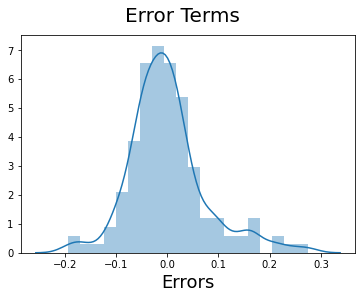

In [203]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)        

# the error terms are normally distributed aroud x=0. So the model is accpetable.

Text(0, 0.5, 'y_train-y_train_pred')

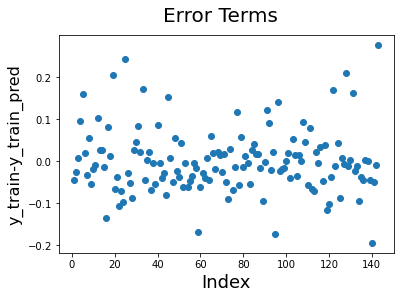

In [204]:
# plotting error distribution to check any pattern
fig = plt.figure()
c = [i for i in range(1,144,1)]
plt.scatter(c,y_train-y_train_pred)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('y_train-y_train_pred', fontsize=16)       

# there is no pattern. So assumption of linear regression is fullfilled

## Testing model on test data

In [205]:
# scaling data on test set
num_vars = ['carlength', 'carheight', 'enginesize', 'boreratio' ,'stroke', 'highwaympg', 'compressionratio', 'peakrpm', 'price']

car_test[num_vars] = scaler.transform(car_test[num_vars])

In [206]:
# splitting into dependent and independent variables
y_test = car_test.pop('price')
X_test = car_test

In [207]:
# Creating X_test1 dataframe by dropping variables from X_test
X_test1 = X_test[X_train_rfe10.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test1)

In [208]:
# Making predictions
y_test_pred = lm.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

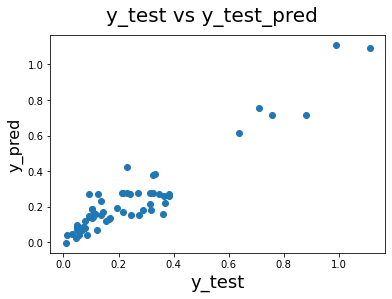

In [209]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

# the data points are spreaded around x=y curve

In [210]:
# calculating r2 value
r2_score(y_true=y_test, y_pred=y_test_pred)


0.8846404790673423

### The r2 value is good and near to the train data (0.877) which shows that out model is eualilly fitted for train and test data set

In [211]:
# calculate RMSE
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# RMSE is small and in accepytable range

RMSE : 0.0785223711520101


Text(0, 0.5, 'y_test-y_test_pred')

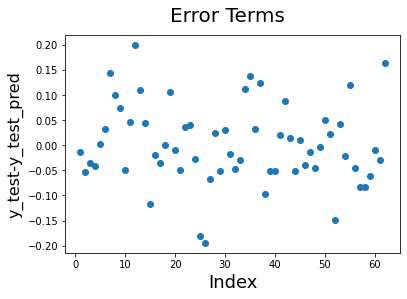

In [212]:
# cheking error spread
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_test_pred)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('y_test-y_test_pred', fontsize=16)               

# randmness show that modelis good

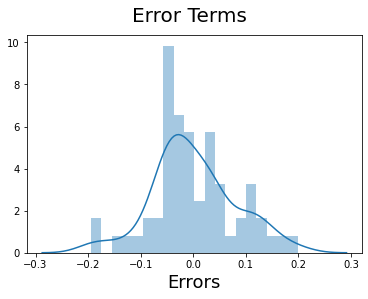

In [213]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label    
plt.show()
# the graph is roughly normally distributed

### Residual analysis and test assessment shows that the model is well fitted and can be accepted



# 6. Conclusion

From the final model we have all our variables in the permissible limits and the model looks to be stable. The error terms are also normally distributed. Overall the model looks good.

So, the final model looks stable with all the values within permisible limits. Residuals are also normally distributed. The deciding factors includes:

    1. enginesize	
    2. peakrpm
    3. carbody_hatchbak
    4. enginetype_rotor
    5. cylindernumber_twelve
    6. car_segment_premier

The model is having R-squared and Adjusted R-squared both 0.87. Prob (F-statistic) is almost zero and p-value for all the variable is less than 0.05 which shows the model is statistically significant.

The proposed model is -

<b> price = (1.0339 x enginesize) + (0.0965 x peakrpm) + (-0.0425 x carbody_hatchbak) + (0.2266 x enginetype_rotor)+ (-0.3441 x cylindernumber_twelve) + (0.2134 x car_segment_premier) - 0.0836 </b>